In [15]:
!pip install NLTK_DATA

ERROR: Could not find a version that satisfies the requirement NLTK_DATA (from versions: none)
ERROR: No matching distribution found for NLTK_DATA


In [16]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
data = pd.read_csv("/content/drive/MyDrive/Movie_Review.csv")

In [19]:
data.dropna(inplace=True)

In [20]:
# we don't have any missing values
# lets do some clean up in the text.
# we might be having some kind of stopwords will be true.
# which are not going to give much context about the data.
# lets remove those stopwords from here.

In [21]:
def clean_review(review):
  str = ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
  return str

# we are checking each and every word in the review data.
# we are splitting it up and we are converting it into the lower case and we are checking that lower case word shoudl not

In [22]:
# now lets apply it to the entire data.

data['text'] = data['text'].apply(clean_review)

In [23]:
# create a wordcloud
# it will print all the words in the document in a image
# but it won't print all the words in the doc in a different site
# based on the number of times that particular word has been repeated in the document.
# if the font is bigger, the word has been repeated more number of times in the document.
# now lets draw the word cloud for the negative sentiment records.

from wordcloud import WordCloud

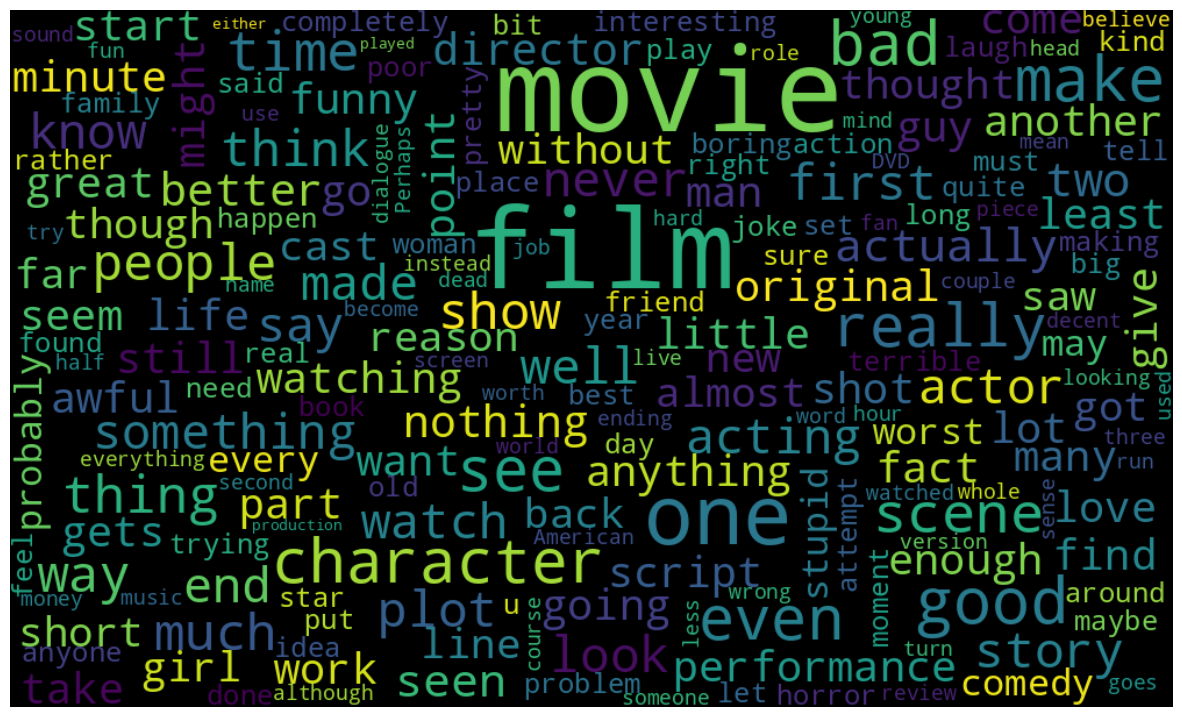

In [24]:
# draw WordCloud
# first take all the words in negative reviews

reviews = ' '.join(word for word in data['text'][data['sentiment'] == 'neg'].astype(str))

# here, we are taking each and every word in the reviews, where the sentiment = negative


# lets create an object for the wordcloud

wordcloud = WordCloud(height = 600,width =1000, max_font_size = 100)
plt.figure(figsize = (15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

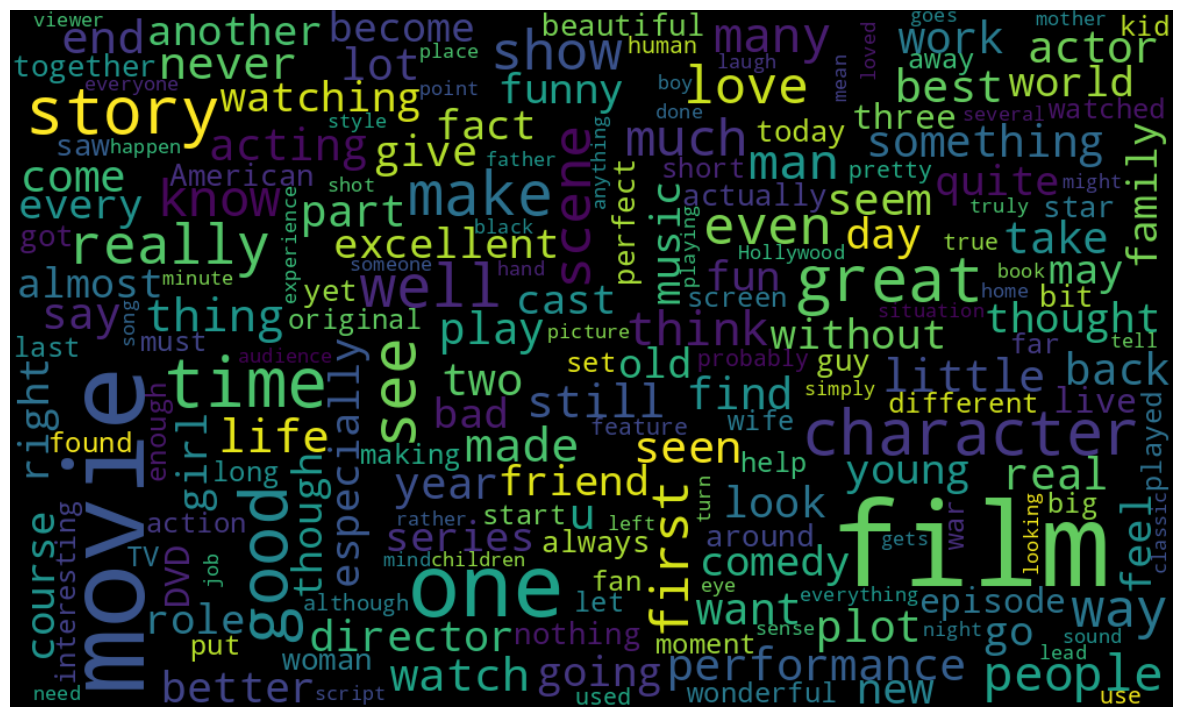

In [25]:
reviews = ' '.join(word for word in data['text'][data['sentiment']== 'pos'].astype(str))
wordcloud = WordCloud(height = 600, width = 1000, max_font_size =100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
# now we have all this text data, but the model we are going to use here is Logistic Regression.
# LR works on statistical data. So we have to convert text data into numerical data. Then we'll feed into our model

# "tfid vectorizer" converts text data into numerical format.
# import it from sklearm

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)

In [28]:
reviews = cv.fit_transform(data['text']).toarray()

# now our reviews are converted into the numerical format.

In [29]:
# in the same way lets convert positive and negative of the sentiment also in numerical values.

data['sentiment'] = data['sentiment'].replace(['pos','neg'],[1,0])

In [30]:
data['sentiment'].value_counts()

0    500
1    500
Name: sentiment, dtype: int64

In [31]:
# now out data is ready, lets create a model from it.

from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression()

In [33]:
#now we have to do the splitting. 80% of data into training dataset and 20% of data into test dataset


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
reviews_train, reviews_test, sent_train, sent_test = train_test_split(reviews, data['sentiment'], test_size=0.2)

# we have done data splitting

In [36]:
# now we have to feed data into our model.

model.fit(reviews_train, sent_train)

LogisticRegression()

In [37]:
# Now our model has been created

In [38]:
# now lets predict the values with our model.

predict = model.predict(reviews_test)

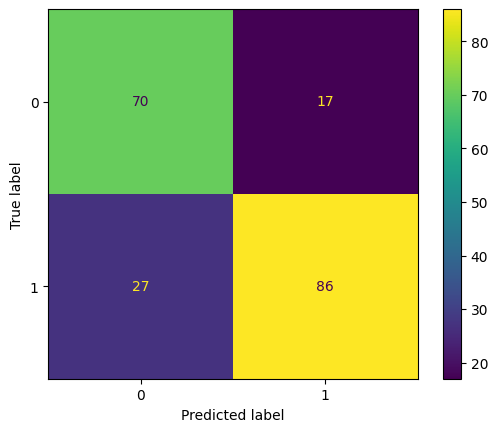

In [44]:
# now lets check how accurately our model is working.
# confusion_matrix will give us insights how many times our model had predicted correctly and how many times our mdoe.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(sent_test, predict, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
display.plot()
plt.show()

In [45]:
# If you take values as 0 and 0 hereby,
# 87 values are the false values.
# But 18 negative reviews are treated as positive reviews by our model.
# 77 actual positive reviews are predicted our model as positive reviews.
# 18 actual positive reviews are predicted our model as negative reviews.
# lets export this model and create a web application

import pickle as pk
pk.dump(model,open('model.pkl','wb'))
pk.dump(cv,open('scaler.pkl','wb'))